# TUGAS INDIVIDU
# Mujadid Choirus Surya
# 121450015
# RA

# A. Fungsi Diskriminan

## Fisher Linear Disc

In [ ]:
import numpy as np
import pandas as pd
from numpy.linalg import inv as inv
import matplotlib.pyplot as plt
from scipy.stats import norm as norm
from sklearn.model_selection import train_test_split

In [ ]:
def plot_pdfs(mean1, mean2, std1, std2, threshold, dataset_name):
    # change X limits for pdf plot to -3 to 3 if normalised W is used. Otherwise set it to -30 to 30
    X_axis = np.linspace(-3.0,3.0,100000)
    plt.plot(X_axis, norm.pdf(X_axis, mean1, std1),'-', color='b',label='Class 1 (value 1)')
    plt.plot(X_axis, norm.pdf(X_axis, mean2, std2),'-', color='r',label='Class 2 (value 0)')
    plt.plot([threshold], norm.pdf([threshold], mean1, std1), '.', color='g',label='Threshold')
    plt.legend(loc = 'upper right')
    plt.title('Normal distributions. Threshold = '+ str(threshold))
    plt.savefig('/content/plots' + str(dataset_name) + '_FldaNormDistribution.png')
    plt.show()

In [ ]:
def plot_projections(projections, y_test, threshold, dataset_name):
    proj_pred_data = pd.DataFrame(np.concatenate((projections, y_test), axis=1))
    proj1_pred = proj_pred_data.loc[proj_pred_data[1] == 1][[0]]
    proj2_pred = proj_pred_data.loc[proj_pred_data[1] == 0][[0]]
    plt.plot(proj1_pred, np.ones(proj1_pred.shape), '.', color='b', label='Class 1 (value 1)')
    plt.plot(proj2_pred, np.ones(proj2_pred.shape), '.', color='r',label='Class 2 (value 0)')
    plt.plot([threshold], [1], '.', color='g',label='Threshold')
    plt.legend(loc = 'upper right')
    plt.title('Projections onto W vector. Threshold = '+ str(threshold))
    plt.savefig('/content/plots' + str(dataset_name) + '_FldaProjections.png')
    plt.show()

In [ ]:
def solve_pdfs(pdf_mean_1, pdf_mean_2, pdf_std_1, pdf_std_2):
    coeff1 = 1/(2*pdf_std_1**2) - 1/(2*pdf_std_2**2)
    coeff2 = pdf_mean_2/(pdf_std_2**2) - pdf_mean_1/(pdf_std_1**2)
    coeff3 = pdf_mean_1**2 /(2*pdf_std_1**2) - pdf_mean_2**2 / (2*pdf_std_2**2) - np.log(pdf_std_2/pdf_std_1)

    coeffs = [coeff1, coeff2, coeff3]

    roots_of_eq = np.roots(coeffs)
    threshold = roots_of_eq[1]
    return threshold

In [ ]:
def find_w_cordinates(X_train1, X_train2):


    Mean1 = np.mean(X_train1,axis=0)
    Mean2 = np.mean(X_train2,axis=0)
    Mean_difference = np.subtract(Mean1,Mean2)

    Cov1 = np.cov(np.transpose(X_train1))
    Cov2 = np.cov(np.transpose(X_train2))


    Sw_inv = np.linalg.inv(np.add(Cov1,Cov2))


    W = np.dot(Sw_inv,Mean_difference)

    W_norm = W / np.linalg.norm(W)

    return W_norm

In [ ]:
def find_threshold(X_train1, X_train2, W, dataset_name):

    Proj1 = np.dot(W,X_train1.transpose())
    Proj2 = np.dot(W,X_train2.transpose())

    proj_mean1 = np.mean(Proj1)
    proj_mean2 = np.mean(Proj2)

    proj_std1 = np.std(Proj1)
    proj_std2 = np.std(Proj2)

    threshold = solve_pdfs(proj_mean1, proj_mean2, proj_std1, proj_std2)

    plot_pdfs(proj_mean1, proj_mean2, proj_std1, proj_std2, threshold, dataset_name)
    return threshold

In [ ]:
def find_predictions(X_test, W, threshold):
  proj_testdata = np.dot(W, X_test.transpose()).reshape(X_test.shape[0],1)

  predictions = (proj_testdata >= threshold).astype(int).reshape(X_test.shape[0],1)

  return proj_testdata, predictions

In [ ]:
def accuracy(actual, predicted):

  return np.mean((actual == predicted).astype(int))

In [ ]:
def precision(actual, predicted):
  TP = np.count_nonzero(np.logical_and((actual == 1) , (predicted == 1)).astype(int))
  FP = np.count_nonzero(np.logical_and((actual == 0) , (predicted == 1)).astype(int))
  return TP/(TP + FP)

In [ ]:
def recall(actual, predicted):
  TP = np.count_nonzero(np.logical_and((actual == 1) , (predicted == 1)).astype(int))
  FN = np.count_nonzero(np.logical_and((actual == 1) , (predicted == 0)).astype(int))
  return TP/(TP + FN)

In [ ]:
def f_score(actual,predicted):
  P = precision(actual, predicted)
  R = recall(actual, predicted)
  return 2*P*R/(P+R)


In [ ]:
def fisher(X_train1, X_train2, X_test, y_test, dataset_name):
  W = find_w_cordinates(X_train1, X_train2)
  threshold = find_threshold(X_train1, X_train2, W, dataset_name)
  projections, y_predicted = find_predictions(X_test, W, threshold)
  plot_projections(projections, y_test, threshold, dataset_name)

  print('W',W)
  print('Threshold',threshold)
  print('accuracy',accuracy(y_test, y_predicted))
  print('precisions',precision(y_test, y_predicted))
  print('recall',recall(y_test, y_predicted))
  print('f_score',f_score(y_test, y_predicted))

## Dataset 1

In [ ]:
data = pd.read_csv('D:\KULIAH/Semester 5/PM/a1_d1.csv',header=None)

"""
N = jumlah total poin dalam set data yang diberikan
X = [
     [f1, f2, f3, ..] (1),
     [f1, f2, f3, ..] (2),
     [..............] (.),
     [..............] (.),
     [..............] (N)
    ]

y = [label1, label2, label3, ....labelN]

"""

X = data[[0,1]]
y = data[[2]]

X_1 = data.loc[data[2]==1][[0,1]]
X_2 = data.loc[data[2]==0][[0,1]]
print('TESTCASE - 1')
fisher(X_1, X_2, X, y.values, "a1_d1")

# Latihan

### Bagaimana code python jika menggunakan data a1_d2.csv

In [ ]:
data = pd.read_csv('/content/a1_d2.csv', header=None)

"""
N = jumlah total poin dalam set data yang diberikan

X = [
     [f1, f2, f3, ..] (1),
     [f1, f2, f3, ..] (2),
     [..............] (.),
     [..............] (.),
     [..............] (N)
    ]

y = [label1, label2, label3, ....labelN]

"""


X = data[[0,1,2]]
y = data[[3]]

# label = 1 -> Class 1
# label = 0 -> Class 2

X_1 = data.loc[data[3]==1][[0,1,2]]
X_2 = data.loc[data[3]==0][[0,1,2]]

print('TESTCASE - 2')
fisher(X_1, X_2, X, y.values, "a1_d2")

### Apa perbedaan dari output yang diperoleh saat data a1_d1 dan a1_d2.

**Bobot (W):** Dataset 1 memiliki dua fitur dengan bobot [0.03304637 0.99945382].
Dataset 2 memiliki tiga fitur dengan bobot [-0.00655686 -0.01823739 0.99981218]. Ini menunjukkan bahwa dataset kedua mungkin memiliki dimensi yang lebih tinggi.

**Threshold:** Threshold yang lebih rendah dapat mengindikasikan bahwa dataset kedua mungkin memiliki distribusi data yang berbeda atau tingkat kepercayaan yang lebih tinggi dalam memisahkan kelas (Dapat dilihat juga berdasarkan grafik bahwa nilai threshold dataset2 berada jauh diantara dua nilai dari data class). Dataset 2 memiliki nilai threshold yang lebih rendah dari pada Dataset 1.

**Metrik Klasifikasi:** Pada Dataset 2 memiliki hasil matrik yang sempurna yaitu sebesar 100%. Metrik klasifikasi yang sempurna ini menunjukkan bahwa model pada dataset kedua mampu memisahkan kelas dengan sangat baik.

Model pada dataset kedua mungkin lebih kompleks dan mampu menangkap pola data yang lebih baik, menghasilkan hasil klasifikasi yang sempurna (akurasi, presisi, recall, dan F-score semuanya 1.0).

### Tuliskan Pseudocode dari code data a1_d1 dan a1_d2.

1. Baca data dari file CSV menggunakan pandas: data = pd.read_csv('/content/a1_d1.csv', header=None)

2. Ambil nilai fitur (kolom 0 dan 1) dan label (kolom 2) dari data:
   X = data[[0, 1]]
   y = data[[2]]

3. Pisahkan data berdasarkan label:
   X_1 = Ambil baris dari data di mana labelnya adalah 1 dan kolomnya adalah [0, 1]
   X_2 = Ambil baris dari data di mana labelnya adalah 0 dan kolomnya adalah [0, 1]

4. Cetak pesan 'TESTCASE - 1'

5. Panggil fungsi fisher(X_1, X_2, X, y.values, "a1_d1") untuk menjalankan algoritma Fisher Linear Discriminant.

6. Fungsi fisher(X_1, X_2, X, y, filename): \
   a. Hitung mean dari masing-masing kelas: mean_1, mean_2 \
   b. Hitung scatter matrices: S_1, S_2 \
   c. Hitung within-class scatter matrix: Sw = S_1 + S_2 \
   d. Hitung between-class scatter matrix: Sb = (mean_1 - mean_2) * (mean_1 - mean_2).T \
   e. Hitung eigenvectors dan eigenvalues dari matriks (Sw^-1) * Sb \
   f. Pilih eigenvector dengan eigenvalue terbesar sebagai vektor proyeksi W \
   g. Lakukan proyeksi data ke dalam ruang 1D menggunakan vektor proyeksi W \
   h. Hitung threshold menggunakan mean proyeksi data dari masing-masing kelas \
   i. Hitung akurasi, presisi, recall, dan F-score dari hasil prediksi \
   j. Simpan hasil evaluasi dan model ke dalam file dengan nama "filename_evaluation.txt" dan "filename_model.txt" respectively 


1. Baca data dari file CSV menggunakan pandas: data = pd.read_csv('/content/a1_d2.csv', header=None)

2. Ambil nilai fitur (kolom 0, 1, dan 2) dan label (kolom 3) dari data:
   X = data[[0, 1, 2]]
   y = data[[3]]

3. Pisahkan data berdasarkan label:
   X_1 = Ambil baris dari data di mana labelnya adalah 1 dan kolomnya adalah [0, 1, 2]
   X_2 = Ambil baris dari data di mana labelnya adalah 0 dan kolomnya adalah [0, 1, 2]

4. Cetak pesan 'TESTCASE - 2'

5. Panggil fungsi fisher(X_1, X_2, X, y.values, "a1_d2") untuk menjalankan algoritma Fisher Linear Discriminant.

6. Fungsi fisher(X_1, X_2, X, y, filename): \
   a. Hitung mean dari masing-masing kelas: mean_1, mean_2 \
   b. Hitung scatter matrices: S_1, S_2 \
   c. Hitung within-class scatter matrix: Sw = S_1 + S_2 \
   d. Hitung between-class scatter matrix: Sb = (mean_1 - mean_2) * (mean_1 - mean_2).T \
   e. Hitung eigenvectors dan eigenvalues dari matriks (Sw^-1) * Sb \
   f. Pilih eigenvector dengan eigenvalue terbesar sebagai vektor proyeksi W \
   g. Lakukan proyeksi data ke dalam ruang 1D menggunakan vektor proyeksi W \
   h. Hitung threshold menggunakan mean proyeksi data dari masing-masing kelas \
   i. Hitung akurasi, presisi, recall, dan F-score dari hasil prediksi \
   j. Simpan hasil evaluasi dan model ke dalam file dengan nama "filename_evaluation.txt" dan "filename_model.txt" respectively 


## Perceptron

In [65]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [66]:
def load_data():
    URL_="https://archive.ics.uci.edu/ml/machine-learning-databases/iris/iris.data"
    data = pd.read_csv(URL_, header =None)
    print(data)


    #membuat dataset dapat dipisahkan secara linear
    data = data[:100]
    data[4] = np.where(data.iloc[:, -1]=="Iris-setosa",0,1)
    data= np.asmatrix(data, dtype= "float64")
    return data
data= load_data()

       0    1    2    3               4
0    5.1  3.5  1.4  0.2     Iris-setosa
1    4.9  3.0  1.4  0.2     Iris-setosa
2    4.7  3.2  1.3  0.2     Iris-setosa
3    4.6  3.1  1.5  0.2     Iris-setosa
4    5.0  3.6  1.4  0.2     Iris-setosa
..   ...  ...  ...  ...             ...
145  6.7  3.0  5.2  2.3  Iris-virginica
146  6.3  2.5  5.0  1.9  Iris-virginica
147  6.5  3.0  5.2  2.0  Iris-virginica
148  6.2  3.4  5.4  2.3  Iris-virginica
149  5.9  3.0  5.1  1.8  Iris-virginica

[150 rows x 5 columns]


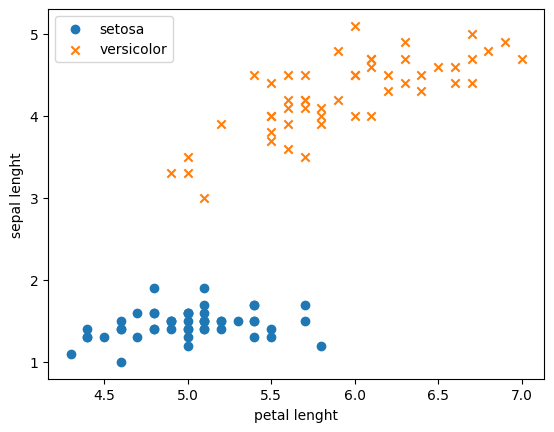

In [67]:
plt.scatter(np.array(data[:50,0]), np.array(data[:50,2]), marker="o", label ="setosa")
plt.scatter(np.array(data[50:,0]), np.array(data[50:,2]), marker="x", label ="versicolor")
plt.xlabel("petal lenght")
plt.ylabel("sepal lenght")
plt.legend()
plt.show()

In [68]:
def percepton(data, num_iter):
    features = data[:, :-1]
    labels = data[:, -1]
    # Inisialisasi bobot ke nol
    w = np.zeros(shape=(1, features.shape[1]+1))
    misclassified_ = []
    for epoch in range(num_iter):
        misclassified = 0
        for x, label in zip(features, labels):
            x = np.insert(x, 0, 1)
            y = np.dot(w, x.transpose())
            target = 0.1 if (y > 0) else 0.0


            delta =(label.item(0,0) - target)
           
            if delta:  # Misclassified
                misclassified += 1
                w += delta * x


        misclassified_.append(misclassified)
    return w, misclassified_


# Contoh penggunaan
num_iter = 10
w, misclassified_ = percepton(data, num_iter)

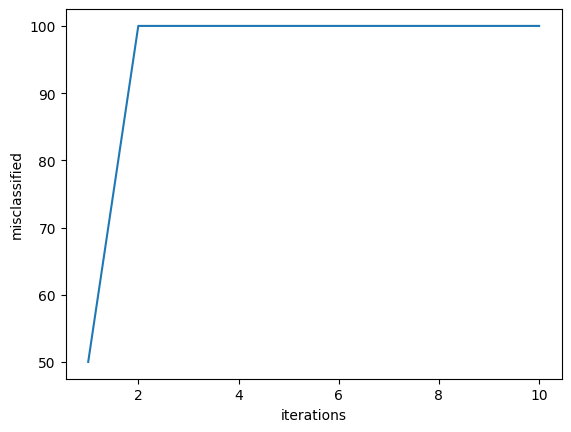

In [69]:
epochs = np.arange (1, num_iter+1)
plt.plot(epochs, misclassified_)
plt.xlabel("iterations")
plt.ylabel("misclassified")
plt.show()

# Latihan

### Buatlah Pseudo code dari code diatas dan buatlah flowchartnya

1. Function load_data():\
   a. Ambil data dari URL "https://archive.ics.uci.edu/ml/machine-learning-databases/iris/iris.data". \
   b. Batasi data hanya untuk dua kelas pertama (Iris-setosa dan Iris-versicolor). \
   c. Ubah label Iris-setosa menjadi 0 dan Iris-versicolor menjadi 1.\
   d. Return data yang telah dimodifikasi dalam bentuk matriks.

2. Function percepton(data, num_iter):\
   a. Ambil fitur-fitur dan label-label dari data.\
   b. Inisialisasi bobot (w) ke nilai nol.\
   c. Inisialisasi list kosong untuk menyimpan jumlah data yang salah klasifikasi pada setiap iterasi (misclassified_).\
   d. Loop sebanyak num_iter kali:\
      i. Inisialisasi variabel misclassified ke 0.\
      ii. Loop untuk setiap data dalam features dan labels:\
          - Tambahkan nilai 1 di awal fitur (x).\
          - Hitung nilai output (y) dengan mengalikan bobot (w) dengan fitur (x).\
          - Tentukan nilai target sesuai dengan fungsi aktivasi (0.1 jika y > 0, 0.0 jika tidak).\
          - Hitung selisih (delta) antara label aktual dan target.\
          - Jika delta tidak sama dengan 0 (data salah klasifikasi):\
              - Tingkatkan misclassified.\
              - Perbarui bobot (w) dengan menambahkan delta dikali dengan fitur (x).\
      iii. Tambahkan nilai misclassified ke dalam list misclassified_.\
   e. Return bobot (w) dan list misclassified_.

3. Contoh penggunaan:\
   a. Tentukan jumlah iterasi (num_iter) yang diinginkan.\
   b. Panggil function percepton(data, num_iter) untuk mendapatkan bobot (w) dan list misclassified_.\
   c. Buat array epochs dari 1 hingga num_iter.\
   d. Plot grafik jumlah data yang salah klasifikasi terhadap iterasi menggunakan plt.plot(epochs, misclassified_).\
   e. Tampilkan grafik dengan label sumbu x "iterations" dan label sumbu y "misclassified".\
   f. Selesai.


### Buatlah code dan flowchart untuk klasifikasi untuk iris virginica dan versicolor!

In [71]:
def load_data():
    URL_="https://archive.ics.uci.edu/ml/machine-learning-databases/iris/iris.data"
    data = pd.read_csv(URL_, header =None)
    print(data)


    #membuat dataset dapat dipisahkan secara linear
    data = data[50:]
    data[4] = np.where(data.iloc[:, -1]=="Iris-virginica",0,1)
    data= np.asmatrix(data, dtype= "float64")
    return data
data= load_data()

       0    1    2    3               4
0    5.1  3.5  1.4  0.2     Iris-setosa
1    4.9  3.0  1.4  0.2     Iris-setosa
2    4.7  3.2  1.3  0.2     Iris-setosa
3    4.6  3.1  1.5  0.2     Iris-setosa
4    5.0  3.6  1.4  0.2     Iris-setosa
..   ...  ...  ...  ...             ...
145  6.7  3.0  5.2  2.3  Iris-virginica
146  6.3  2.5  5.0  1.9  Iris-virginica
147  6.5  3.0  5.2  2.0  Iris-virginica
148  6.2  3.4  5.4  2.3  Iris-virginica
149  5.9  3.0  5.1  1.8  Iris-virginica

[150 rows x 5 columns]


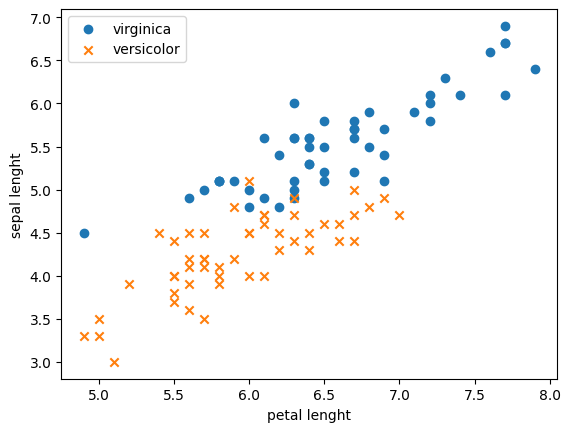

In [72]:
plt.scatter(np.array(data[50:,0]), np.array(data[50:,2]), marker="o", label ="virginica")
plt.scatter(np.array(data[:50,0]), np.array(data[:50,2]), marker="x", label ="versicolor")
plt.xlabel("petal lenght")
plt.ylabel("sepal lenght")
plt.legend()
plt.show()

In [73]:
def percepton(data, num_iter):
    features = data[:, :-1]
    labels = data[:, -1]
    # Inisialisasi bobot ke nol
    w = np.zeros(shape=(1, features.shape[1]+1))
    misclassified_ = []
    for epoch in range(num_iter):
        misclassified = 0
        for x, label in zip(features, labels):
            x = np.insert(x, 0, 1)
            y = np.dot(w, x.transpose())
            target = 0.1 if (y > 0) else 0.0


            delta =(label.item(0,0) - target)
           
            if delta:  # Misclassified
                misclassified += 1
                w += delta * x


        misclassified_.append(misclassified)
    return w, misclassified_


# Contoh penggunaan
num_iter = 10
w, misclassified_ = percepton(data, num_iter)

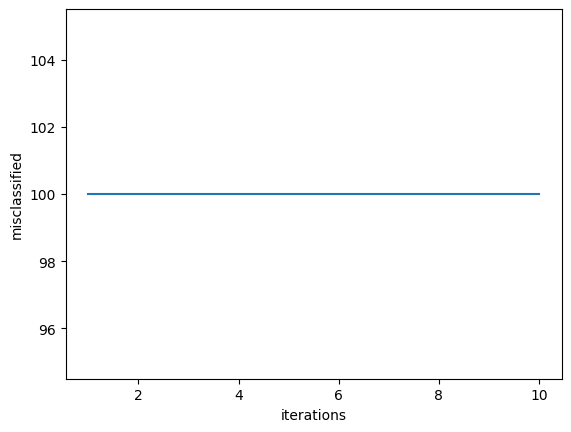

In [74]:
epochs = np.arange (1, num_iter+1)
plt.plot(epochs, misclassified_)
plt.xlabel("iterations")
plt.ylabel("misclassified")
plt.show()

### Dan buatlah persamaan fungsi deskriminan dari pemograman diatas dengan penggambaran geometry fungsi deskriminan.

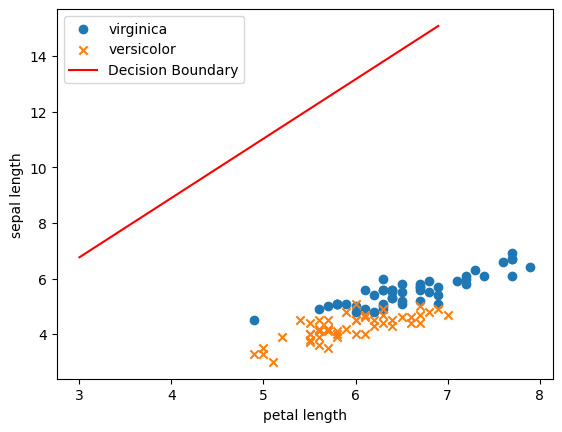

In [102]:
# Menggunakan nilai w0, w1, dan w2 yang telah dipelajari
w0 = w[0, 0]
w1 = w[0, 1]
w2 = w[0, 2]

# Menggambar garis pemisah (fungsi diskriminan) dalam scatter plot
x_vals = np.linspace(data[:, 2].min(), data[:, 2].max(), 100)  # Range x (petal length)
y_vals = (w0 + w1 * x_vals) / w2  # Menghitung nilai y (sepal length) berdasarkan fungsi diskriminan

plt.scatter(np.array(data[50:, 0]), np.array(data[50:, 2]), marker="o", label="virginica")
plt.scatter(np.array(data[:50, 0]), np.array(data[:50, 2]), marker="x", label="versicolor")
plt.plot(x_vals, y_vals, color='red', label='Decision Boundary')
plt.xlabel("petal length")
plt.ylabel("sepal length")
plt.legend()
plt.show()



# B. Model Probabilistik

## Pendekatan Diskriminatif

In [ ]:
# Mengimpor library
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd


# Mengimpor dataset
dataset = pd.read_csv('D:\KULIAH/Semester 5/PM/Iklan_sosmed.csv')
x = dataset.iloc[:, [2, 3]].values
y = dataset.iloc[:, 4].values


# Membagi data ke dalam training dan test set
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(x, y, test_size=0.25, random_state=0)


# Feature scaling
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)


# Membuat model regresi logistik dari training set
from sklearn.linear_model import LogisticRegression  # Perbaiki penulisan 'linier' menjadi 'linear'
classifier = LogisticRegression(random_state=0)
classifier.fit(X_train, y_train)


In [ ]:
# Memprediksi hasil modelnya ke test set
y_pred = classifier.predict(X_test)


# Membuat confusion matrix
from sklearn.metrics import confusion_matrix  
cm = confusion_matrix(y_test, y_pred)


# Memvisualisasikan hasil training set
from matplotlib.colors import ListedColormap
X_set, y_set = X_train, y_train
X1, X2 = np.meshgrid(np.arange(start = X_set[:, 0].min() - 1, stop = X_set[:, 0].max() + 1, step = 0.01),
                     np.arange(start = X_set[:, 1].min() - 1, stop = X_set[:, 1].max() + 1, step = 0.01))
plt.contourf(X1, X2, classifier.predict(np.array([X1.ravel(), X2.ravel()]).T).reshape(X1.shape),
            alpha = 0.75, cmap = ListedColormap(('red', 'green')))
plt.xlim(X1.min(), X1.max())
plt.ylim(X2.min(), X2.max())
for i, j in enumerate(np.unique(y_set)):
    plt.scatter(X_set[y_set == j, 0], X_set[y_set == j, 1],
                c = ListedColormap(('red', 'green'))(i), label = j)
plt.title('Logistic Regression (Training set)')
plt.xlabel('Usia')
plt.ylabel('Estimasi Gaji')
plt.legend()
plt.show()


In [ ]:
# Memvisualisasikan hasil test set
from matplotlib.colors import ListedColormap
X_set, y_set = X_test, y_test
X1, X2 = np.meshgrid(np.arange(start = X_set[:, 0].min() - 1, stop = X_set[:, 0].max() + 1, step = 0.01),
                     np.arange(start = X_set[:, 1].min() - 1, stop = X_set[:, 1].max() + 1, step = 0.01))
plt.contourf(X1, X2, classifier.predict(np.array([X1.ravel(), X2.ravel()]).T).reshape(X1.shape),
            alpha = 0.75, cmap = ListedColormap(('red', 'green')))
plt.xlim(X1.min(), X1.max())
plt.ylim(X2.min(), X2.max())
for i, j in enumerate(np.unique(y_set)):
    plt.scatter(X_set[y_set == j, 0], X_set[y_set == j, 1],
                c = ListedColormap(('red', 'green'))(i), label = j)
plt.title('Logistic Regression (Test set)')
plt.xlabel('Usia')
plt.ylabel('Estimasi Gaji')
plt.legend()
plt.show()


# Latihan

### Tuliskan perumusan matematis fungsi sigmoid yang ada di regresi logistik?

### Tuliskan Pseudocode dari code diatas!

1. Mengimpor library numpy, matplotlib.pyplot, dan pandas
2. Mengimpor dataset dari file CSV 'D:\KULIAH/Semester 5/PM/Iklan_sosmed.csv' ke dalam variabel dataset
3. Memisahkan fitur (kolom 2 dan 3) dan target (kolom 4) dari dataset ke dalam variabel x dan y
4. Membagi data ke dalam training set dan test set (75% training, 25% test) menggunakan train_test_split dari sklearn
5. Melakukan feature scaling pada data training dan test menggunakan StandardScaler dari sklearn
6. Membuat objek model regresi logistik menggunakan LogisticRegression dari sklearn
7. Melatih model menggunakan training set (X_train, y_train) dengan menggunakan metode fit pada objek model
8. Menguji model menggunakan test set (X_test) dengan menggunakan metode predict pada objek model
9. Menghitung confusion matrix menggunakan confusion_matrix dari sklearn dengan input y_test dan y_pred
10. Memvisualisasikan hasil training set pada grafik:
    a. Menggunakan meshgrid untuk membuat grid nilai X1 dan X2
    b. Menggunakan model untuk memprediksi nilai pada grid (X1, X2) dan menghasilkan prediksi warna menggunakan ListedColormap
    c. Menampilkan scatter plot data training set pada grafik dengan warna merah (0) dan hijau (1)
    d. Menampilkan label sumbu X sebagai "Usia" dan label sumbu Y sebagai "Estimasi Gaji"
11. Menampilkan grafik hasil training set
12. Memvisualisasikan hasil test set pada grafik (langkah 10 dengan menggunakan data test set)
13. Menampilkan grafik hasil test set


## Pendekatan Generatif

In [ ]:
# import linrray yang diperlukan
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd


# mengimport dataset
dataset = pd.read_csv('Iklan_sosmed.csv')
x = dataset.iloc[:, [2, 3]].values
y = dataset.iloc[:, 4].values


# menjadikam dataset ke dalam training set dan test set
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size = 0.25, random_state = 0)


# feature scaling
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
x_train = sc.fit_transform(x_train)
x_test = sc.fit_transform(x_test)

In [ ]:
# membuat model naive bayes terhadap training set
from sklearn.naive_bayes import GaussianNB
classifier = GaussianNB()
classifier.fit(x_train, y_train)


# memprediksi hasil test set
y_pred = classifier.predict(x_test)


# membuat confusion matrix
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y_test, y_pred)


# visualisasi hasil model naive bayes dari training set
from matplotlib.colors import ListedColormap
x_set, y_set, = x_train, y_train
X1, X2 = np.meshgrid(np.arange(start = x_set[:, 0].min() - 1, stop = x_set[:, 0].max() + 1, step = 0.01),
                     np.arange(start = x_set[:, 1].min() - 1, stop = x_set[:, 1].max() + 1, step = 0.01))
plt.contourf(X1, X2, classifier.predict(np.array([X1.ravel(), X2.ravel()]).T).reshape(X1.shape),
             alpha = 0.75, cmap = ListedColormap(('red', 'green')))
plt.xlim(X1.min(), X1.max())
plt.ylim(X2.min(), X2.max())
for i, j in enumerate(np.unique(y_set)):
  plt.scatter(x_set[y_set == j, 0], x_set[y_set == j, 1],
              c = ListedColormap(('red', 'green'))(i), label = j)
plt.title('Naive Bayes (Training set)')
plt.xlabel('Usia')
plt.ylabel('Estimasi Gaji')
plt.legend()
plt.show()

In [ ]:
# visualisasi hasil model Naive Bayes dari Tset set
from matplotlib.colors import ListedColormap
x_set, y_set, = x_test, y_test
X1, X2 = np.meshgrid(np.arange(start = x_set[:, 0].min() - 1, stop = x_set[:, 0].max() + 1, step = 0.01),
                     np.arange(start = x_set[:, 1].min() - 1, stop = x_set[:, 1].max() + 1, step = 0.01))
plt.contourf(X1, X2, classifier.predict(np.array([X1.ravel(), X2.ravel()]).T).reshape(X1.shape),
             alpha = 0.75, cmap = ListedColormap(('red', 'green')))
plt.xlim(X1.min(), X1.max())
plt.ylim(X2.min(), X2.max())
for i, j in enumerate(np.unique(y_set)):
  plt.scatter(x_set[y_set == j, 0], x_set[y_set == j, 1],
              c = ListedColormap(('red', 'green'))(i), label = j)
plt.title('Naive Bayes (Test set)')
plt.xlabel('Usia')
plt.ylabel('Estimasi Gaji')
plt.legend()
plt.show()


### Jelaskan dan analisis decision boundery dari output yang diperoleh,

### Buatlah Pseudo code dan flowchart dari code diatas!

1. Import library yang diperlukan:
   - import numpy as np
   - import matplotlib.pyplot as plt
   - import pandas as pd

2. Membaca dataset dari file CSV:
   - dataset = pd.read_csv('Iklan_sosmed.csv')
   - x = dataset.iloc[:, [2, 3]].values
   - y = dataset.iloc[:, 4].values

3. Membagi dataset menjadi training set dan test set:
   - from sklearn.model_selection import train_test_split
   - x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.25, random_state=0)

4. Melakukan feature scaling:
   - from sklearn.preprocessing import StandardScaler
   - sc = StandardScaler()
   - x_train = sc.fit_transform(x_train)
   - x_test = sc.fit_transform(x_test)

5. Membuat model Naive Bayes terhadap training set:
   - from sklearn.naive_bayes import GaussianNB
   - classifier = GaussianNB()
   - classifier.fit(x_train, y_train)

6. Melakukan prediksi terhadap test set:
   - y_pred = classifier.predict(x_test)

7. Membuat confusion matrix untuk evaluasi hasil prediksi:
   - from sklearn.metrics import confusion_matrix
   - cm = confusion_matrix(y_test, y_pred)

8. Visualisasi hasil model Naive Bayes terhadap training set:
   - from matplotlib.colors import ListedColormap
   - x_set, y_set = x_train, y_train
   - X1, X2 = Membuat meshgrid untuk plotting decision boundary.
   - Membuat contour plot dengan warna berdasarkan prediksi model terhadap meshgrid.
   - Scatter plot untuk data training set dengan warna berbeda untuk setiap kelas.
   - Menampilkan judul, label sumbu, dan legenda pada grafik.

9. Visualisasi hasil model Naive Bayes terhadap test set:
   - from matplotlib.colors import ListedColormap
   - x_set, y_set = x_test, y_test
   - X1, X2 = Membuat meshgrid untuk plotting decision boundary.
   - Membuat contour plot dengan warna berdasarkan prediksi model terhadap meshgrid.
   - Scatter plot untuk data test set dengan warna berbeda untuk setiap kelas.
   - Menampilkan judul, label sumbu, dan legenda pada grafik.

10. Selesai.


### Jelaskan kesimoulan dari output yang diperoleh dari studi kasus metode ini! Seberapa sukses iklan